Implement Bayesian classifier - Continuous data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(10)
n_samples = 100
continuous_class0 = np.random.normal(loc=2, scale=1, size=(n_samples, 2))
continuous_class1 = np.random.normal(loc=5, scale=1.5, size=(n_samples, 2))
X_continuous = np.vstack((continuous_class0, continuous_class1))
y_continuous = np.array([0] * n_samples + [1] * n_samples)

In [4]:
def gaussian_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

def bayesian_continuous_classifier(X_train, y_train, X_test):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]
    params = {}
    priors = {}

    for c in classes:
        X_c = X_train[y_train == c]
        priors[c] = len(X_c) / len(X_train)
        params[c] = [(np.mean(X_c[:, f]), np.std(X_c[:, f]) + 1e-6) for f in range(n_features)]

    predictions = []
    for x in X_test:
        posteriors = []
        for c in classes:
            posterior = np.log(priors[c])
            for f in range(n_features):
                mean, std = params[c][f]
                posterior += np.log(gaussian_pdf(x[f], mean, std))
            posteriors.append(posterior)
        predictions.append(classes[np.argmax(posteriors)])
    return np.array(predictions)

In [5]:
train_idx = np.random.choice(2 * n_samples, size=int(0.8 * 2 * n_samples), replace=False)
test_idx = np.setdiff1d(np.arange(2 * n_samples), train_idx)
X_train, y_train = X_continuous[train_idx], y_continuous[train_idx]
X_test, y_test = X_continuous[test_idx], y_continuous[test_idx]
y_pred = bayesian_continuous_classifier(X_train, y_train, X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Continuous Data Accuracy: {accuracy:.4f}")

Continuous Data Accuracy: 0.9250


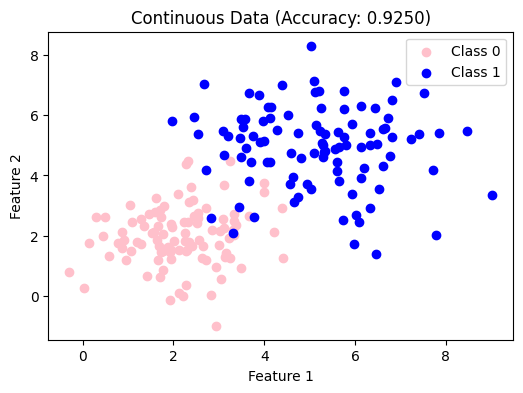

In [7]:

plt.figure(figsize=(6, 4))
plt.scatter(X_continuous[y_continuous == 0, 0], X_continuous[y_continuous == 0, 1], c='pink', label='Class 0')
plt.scatter(X_continuous[y_continuous == 1, 0], X_continuous[y_continuous == 1, 1], c='blue', label='Class 1')
plt.title(f"Continuous Data (Accuracy: {accuracy:.4f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()